# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [11]:
import numpy as np
import matplotlib.pylab as plt

n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

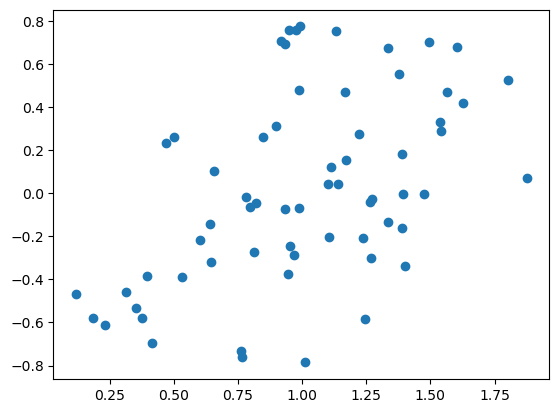

In [8]:
print(plt.scatter(x.T[0], y))

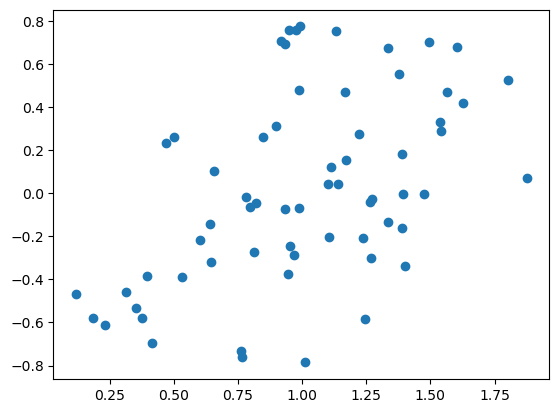

In [9]:
print(plt.scatter(x.T[1], y))

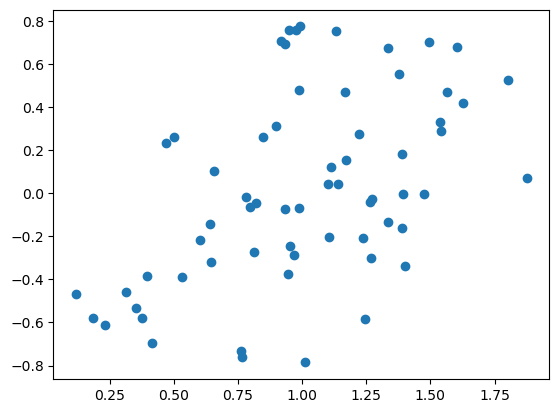

In [10]:
print(plt.scatter(x.T[2], y))

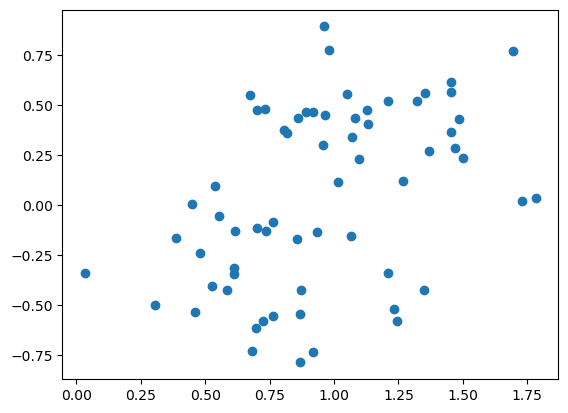

In [12]:
print(plt.scatter(x.T[3], y))

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [19]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)
beta = np.dot(left, right)
beta

array([ 0.4131707 ,  0.17279771,  0.33077514,  0.04301106, -0.93422729])

In [18]:
beta2 = np.linalg.lstsq(x, y)[0]
beta2

C:\Users\kcosm\AppData\Local\Temp\ipykernel_35664\3512153861.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta2 = np.linalg.lstsq(x, y)[0]


array([ 0.4131707 ,  0.17279771,  0.33077514,  0.04301106, -0.93422729])

In [20]:
pred = np.dot(x, beta)
pred

array([-0.27591512, -0.37759977, -0.21943597, -0.49612169, -0.16611062,
       -0.39200898, -0.18905561, -0.36705325, -0.22507701, -0.51726672,
       -0.25068077, -0.23733183, -0.13391604, -0.2457    , -0.23114784,
        0.05218438, -0.1586603 , -0.04654003, -0.33183674, -0.19344652,
        0.02230105, -0.12650439, -0.05161015, -0.22256864, -0.26669651,
       -0.05152555,  0.00528227,  0.02915019, -0.09309301, -0.09062461,
       -0.00694074,  0.09218188,  0.11456188,  0.04587513, -0.1901144 ,
        0.15868422, -0.11585281,  0.23526434, -0.1036093 ,  0.17586923,
        0.26822805,  0.37852073, -0.11977051,  0.35489139,  0.38780027,
        0.11880338,  0.15804415,  0.3439432 ,  0.11685158,  0.2272273 ,
        0.44334519,  0.36398246,  0.43334505,  0.45242907,  0.33181756,
        0.20883442,  0.44523669,  0.3084093 ,  0.24335478,  0.74914247,
        0.52759693,  0.47306056,  0.6491545 ,  0.58476227])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

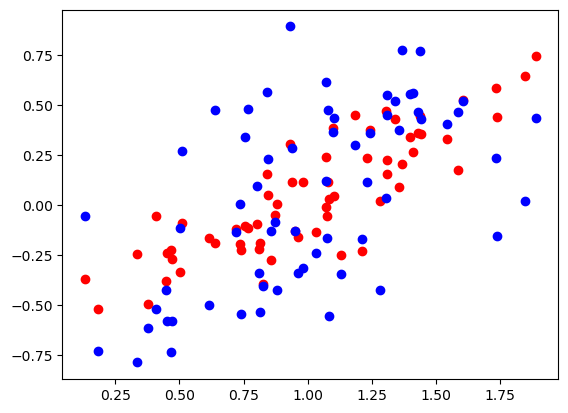

In [22]:
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

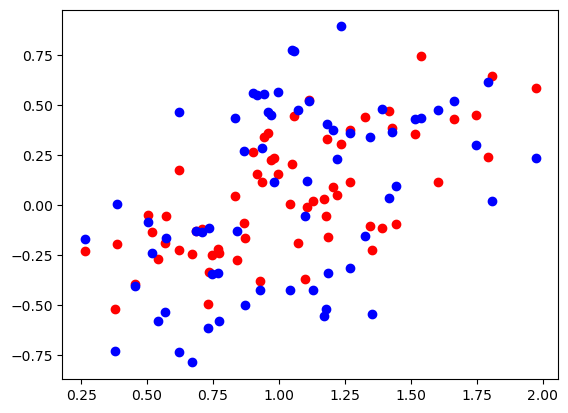

In [23]:
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')

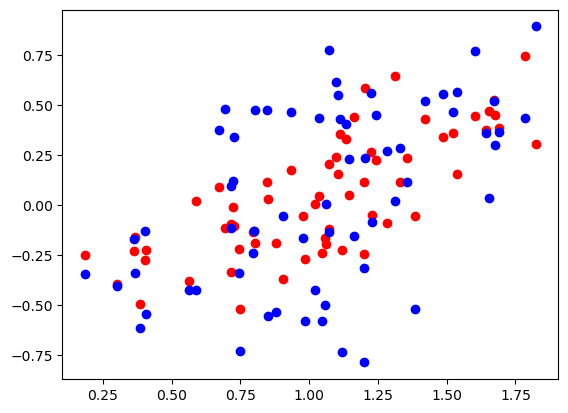

In [24]:
plt.scatter(x.T[2], pred, c='red')
plt.scatter(x.T[2], y, c='b')

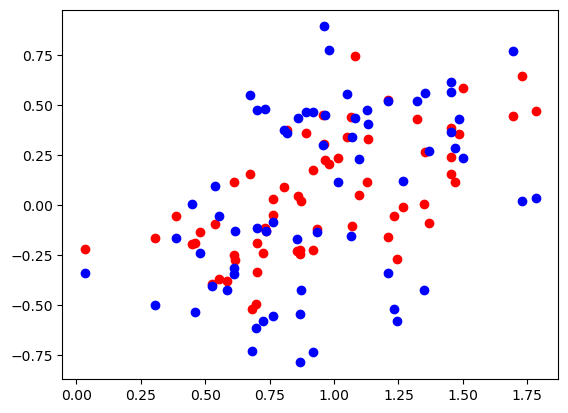

In [25]:
plt.scatter(x.T[3], pred, c='red')
plt.scatter(x.T[3], y, c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [28]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [49]:
columns = ['Income', 'Limit', 'Age', 'Education', 'Balance']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 3.40000e+01, 1.10000e+01, 3.33000e+02,
        1.00000e+00],
       [1.06025e+02, 6.64500e+03, 8.20000e+01, 1.50000e+01, 9.03000e+02,
        1.00000e+00],
       [1.04593e+02, 7.07500e+03, 7.10000e+01, 1.10000e+01, 5.80000e+02,
        1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 6.70000e+01, 1.20000e+01, 1.38000e+02,
        1.00000e+00],
       [3.77280e+01, 2.52500e+03, 4.40000e+01, 1.30000e+01, 0.00000e+00,
        1.00000e+00],
       [1.87010e+01, 5.52400e+03, 6.40000e+01, 7.00000e+00, 9.66000e+02,
        1.00000e+00]])

In [32]:
y = credit['Rating'].values
y

array([283, 483, 514, 681, 357, 569, 259, 512, 266, 491, 589, 138, 394,
       511, 269, 200, 286, 339, 448, 479, 235, 458, 213, 398, 156, 326,
       289, 333, 949, 411, 413, 210, 563, 162, 199, 220, 455, 462, 300,
       264, 253, 538, 351, 445, 469, 564, 376, 320, 205, 354, 376, 301,
       394, 413, 138, 154, 372, 367, 281, 390, 364, 254, 160, 251, 223,
       320, 694, 380, 418, 505, 318, 538, 355, 338, 418, 224, 251, 253,
       468, 171, 288, 317, 344, 122, 232, 828, 448, 182, 352, 543, 431,
       456, 249, 388, 245, 120, 367, 266, 241, 607, 256, 190, 531, 682,
       365, 259, 115, 263, 449, 279, 250, 231, 491, 474, 268, 369, 186,
       626, 173, 137, 128, 599, 481, 117, 192, 195, 433, 259, 610, 279,
       281, 162, 407, 427, 452, 257, 314, 278, 175, 728, 459, 483, 549,
       387, 228, 341, 371, 150, 192, 121, 435, 353, 184, 344, 235, 143,
       338, 406, 406, 235, 381, 160, 515, 203, 429, 367, 214, 178, 219,
       459, 167, 299, 344, 339, 750, 206, 221, 292, 316, 560, 29

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

In [50]:
left = np.linalg.inv(np.dot(X.T, X))
right = np.dot(y.T, X)
beta = np.dot(left, right)
beta

array([ 1.32064098e-01,  6.25891484e-02,  3.25811876e-02, -3.44829447e-01,
        1.51557697e-02,  4.75140526e+01])

In [51]:
pred = np.dot(X, beta)
pred

array([277.53859614, 488.6059157 , 511.45574486, 674.01879394,
       363.10792782, 578.26257737, 262.48307715, 515.15061719,
       257.95174726, 498.93842097, 581.35674608, 128.12325543,
       392.91883044, 501.40136224, 256.22703539, 204.88937408,
       283.56484755, 329.00213929, 464.94219261, 482.00022922,
       226.74075886, 462.79450126, 213.3801447 , 385.15320316,
       155.58650495, 325.41450446, 287.21610228, 338.61807515,
       935.65754446, 412.3850226 , 419.53969793, 218.27598228,
       560.86133988, 163.66120083, 211.77294839, 214.50958334,
       469.96353754, 472.82706423, 298.52078734, 267.85466244,
       258.05335006, 556.3774445 , 354.96039997, 454.75771693,
       462.99928873, 544.07184545, 381.10670713, 339.245888  ,
       191.51797648, 350.01008639, 383.05163357, 298.35495832,
       400.00369957, 404.98564654, 141.78797574, 162.84152926,
       353.963675  , 356.00640027, 268.15713469, 390.53612265,
       381.34908562, 243.76752818, 156.24745563, 235.61

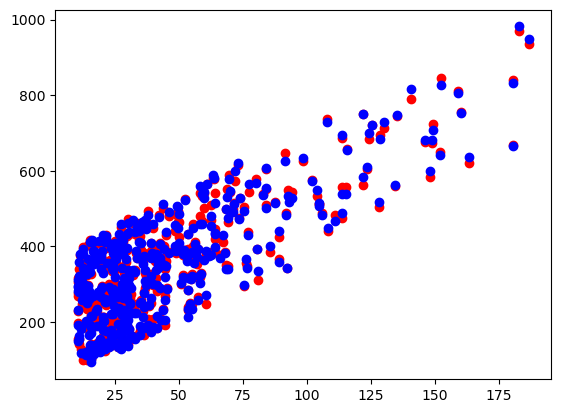

In [52]:
plt.scatter(X.T[0], pred, c='red')
plt.scatter(X.T[0], y, c='b')

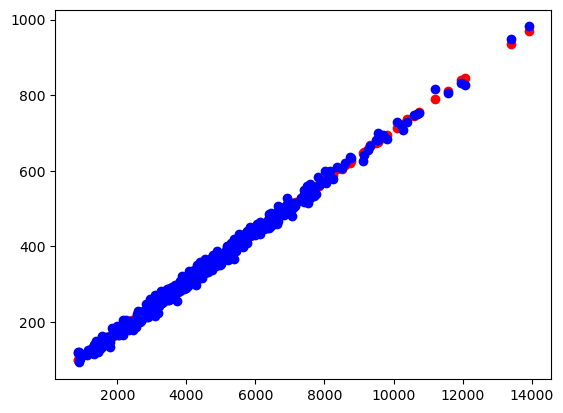

In [53]:
plt.scatter(X.T[1], pred, c='red')
plt.scatter(X.T[1], y, c='b')

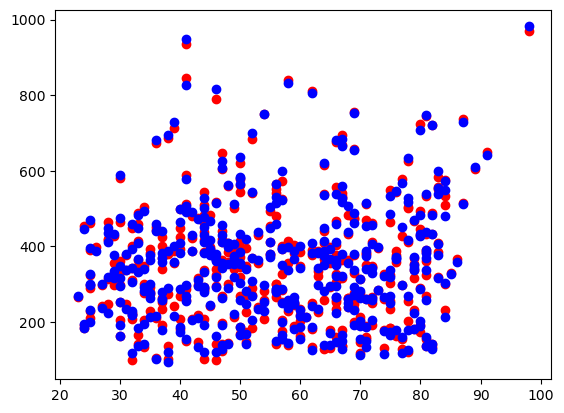

In [54]:
plt.scatter(X.T[2], pred, c='red')
plt.scatter(X.T[2], y, c='b')

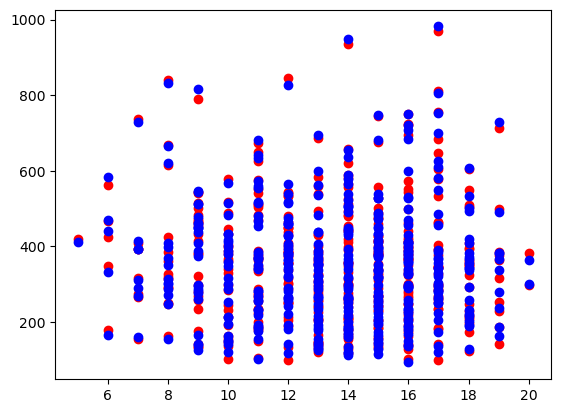

In [55]:
plt.scatter(X.T[3], pred, c='red')
plt.scatter(X.T[3], y, c='b')

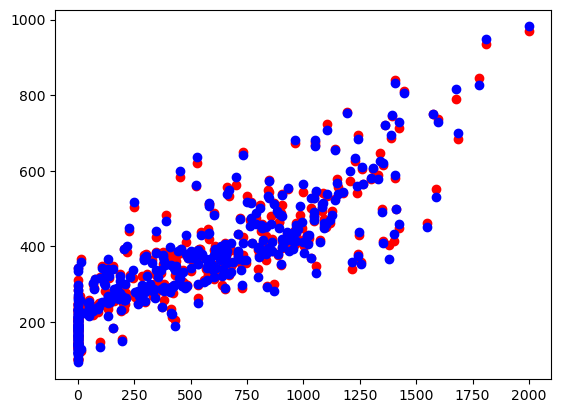

In [56]:
plt.scatter(X.T[4], pred, c='red')
plt.scatter(X.T[4], y, c='b')